<a href="https://colab.research.google.com/github/Rameshkumar2210/Rameshkumar2210/blob/main/analyzing_the_impact_of_social_media_usage_on_student_health_and_produvtively_using_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✅ Starting Analyzing The Impact Of Social Media Usage On Student Health And Produvtively Using Ai



Step 1. Environment

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

Step 2.Import a Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

Step 3.Load Dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load dataset

In [8]:
df = pd.read_csv("/content/drive/MyDrive/Student_Social_Media/full_student_social_media_ai_project_dataset.csv")
print("Dataset Loaded Successfully")

Dataset Loaded Successfully


STEP 4. Data Preview

In [9]:
print(df.head())
print(df.info())
print(df.describe())

   Student_ID  Age  Gender       Course  Year_of_Study  \
0           1   22  Female     Commerce              2   
1           2   20    Male      Science              2   
2           3   21    Male      Science              3   
3           4   17  Female  Engineering              4   
4           5   24  Female  Engineering              3   

   Daily_SocialMedia_Hours Primary_Platform Purpose_of_Usage  \
0                      5.5         WhatsApp    Communication   
1                      4.1          Twitter             News   
2                      3.2          Twitter        Education   
3                      4.2        Instagram    Communication   
4                      4.2          YouTube         Business   

  Night_Usage(Yes/No)  Screen_Time_Hours  ...  Attendance_Percentage  \
0                 Yes               11.2  ...                   68.6   
1                  No                1.5  ...                   81.3   
2                 Yes                5.1  ...     

STEP 5: Data Cleaning

In [11]:
# Convert Yes/No columns to binary
binary_cols = ['Night_Usage(Yes/No)', 'Eye_Strain(Yes/No)', 'AI_Usage_for_Study(Yes/No)']
for col in binary_cols:
    df[col] = df[col].map({'Yes':1, 'No':0})

In [12]:
# Encode categorical columns
categorical_cols = ['Gender','Course','Primary_Platform','Purpose_of_Usage']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


print("Data Cleaning Completed")

Data Cleaning Completed


STEP 6. Visualization

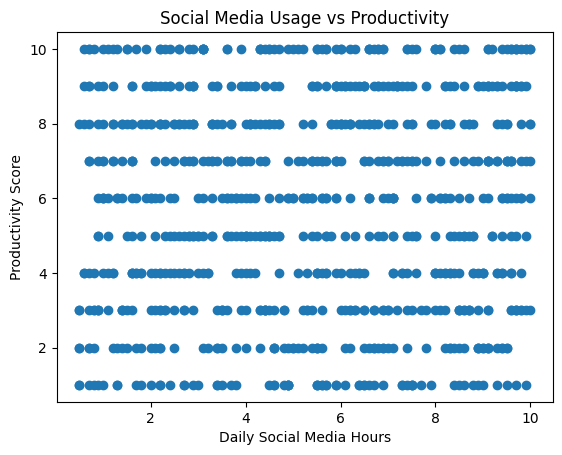

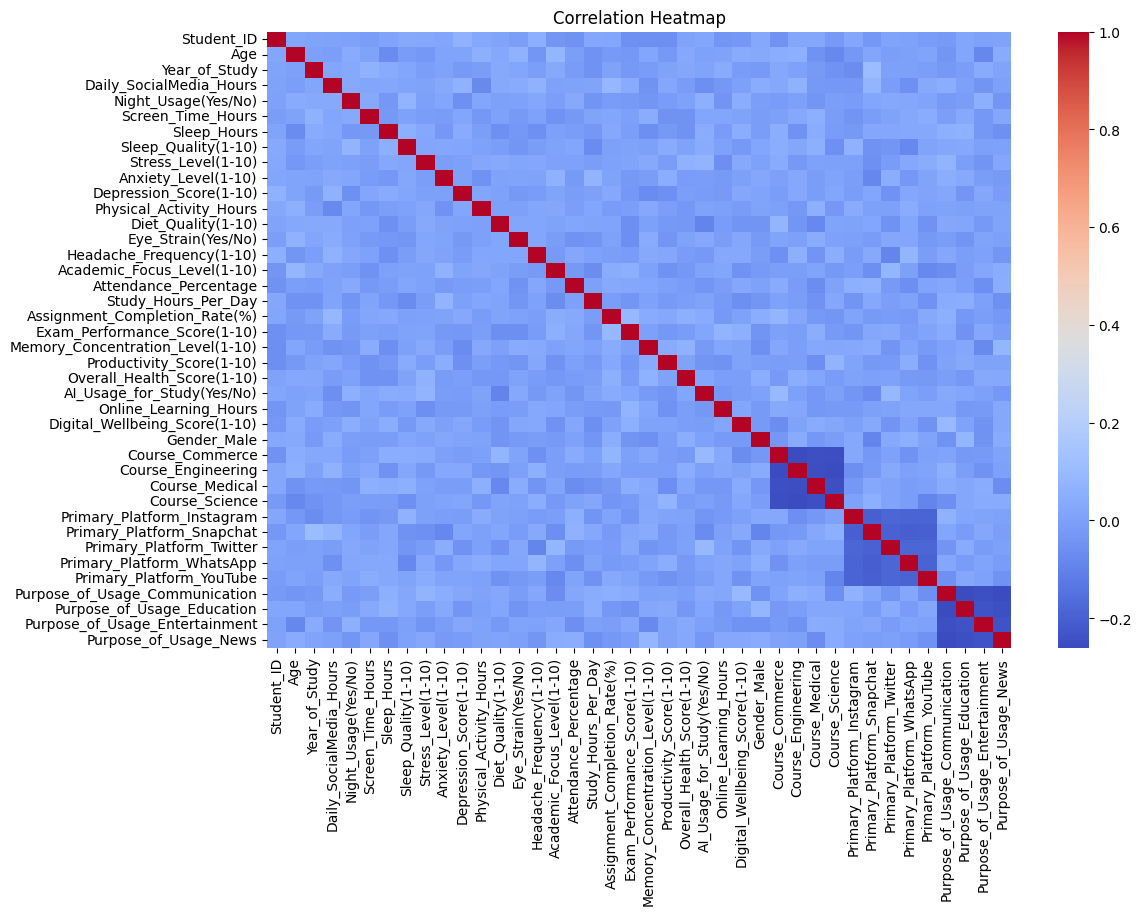

In [13]:
plt.figure()
plt.scatter(df['Daily_SocialMedia_Hours'], df['Productivity_Score(1-10)'])
plt.xlabel('Daily Social Media Hours')
plt.ylabel('Productivity Score')
plt.title('Social Media Usage vs Productivity')
plt.show()


plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

STEP 7. Feature Selection

In [14]:
features = [
'Daily_SocialMedia_Hours','Screen_Time_Hours','Sleep_Hours','Sleep_Quality(1-10)',
'Stress_Level(1-10)','Anxiety_Level(1-10)','Depression_Score(1-10)',
'Physical_Activity_Hours','Diet_Quality(1-10)','Academic_Focus_Level(1-10)',
'Study_Hours_Per_Day','Attendance_Percentage','Assignment_Completion_Rate(%)',
'Exam_Performance_Score(1-10)','Memory_Concentration_Level(1-10)',
'Digital_Wellbeing_Score(1-10)'
]


X = df[features]
y = df['Productivity_Score(1-10)']

STEP 8. Train-Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

STEP 9. Regression AI Model (Productivity Prediction)

In [16]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)


reg_predictions = reg_model.predict(X_test)


print("Regression MSE:", mean_squared_error(y_test, reg_predictions))
print("Regression R2 Score:", r2_score(y_test, reg_predictions))

Regression MSE: 7.845920100082966
Regression R2 Score: -0.017428030099657876


STEP 10. Classification Model (Low/Medium/High Productivity)

In [20]:
# Create labels
def label_productivity(score):
    if score <= 3:
        return 'Low'
    elif score <= 7:
        return 'Medium'
    else:
        return 'High'


df['Productivity_Label'] = df['Productivity_Score(1-10)'].apply(label_productivity)

X_cls = df[features]
y_cls = df['Productivity_Label']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)

cls_model = LogisticRegression(max_iter=1000)
cls_model.fit(X_train_c, y_train_c)

cls_predictions = cls_model.predict(X_test_c)

print("Classification Accuracy:", accuracy_score(y_test_c, cls_predictions))
print("Classification Report:\n", classification_report(y_test_c, cls_predictions))


Classification Accuracy: 0.35625
Classification Report:
               precision    recall  f1-score   support

        High       0.21      0.21      0.21        43
         Low       0.28      0.21      0.24        43
      Medium       0.45      0.53      0.49        74

    accuracy                           0.36       160
   macro avg       0.32      0.32      0.31       160
weighted avg       0.34      0.36      0.35       160



STEP 11. AI Prediction System

In [21]:
new_student = np.array([[
5, 7, 6, 6, 6, 5, 4, 1, 6, 7, 3, 85, 80, 7, 7, 6
]])


predicted_productivity = reg_model.predict(new_student)
predicted_class = cls_model.predict(new_student)


print("Predicted Productivity Score:", predicted_productivity)
print("Predicted Productivity Level:", predicted_class)

Predicted Productivity Score: [5.69753612]
Predicted Productivity Level: ['Medium']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


STEP 12. AI Recommendation System

In [23]:
if predicted_productivity < 4:
    print("Recommendation: Reduce social media usage, improve sleep, physical activity, and mental health habits")
elif predicted_productivity < 7:
    print("Recommendation: Maintain balance and improve daily routine")
else:
    print("Recommendation: Excellent lifestyle and productivity balance")


Recommendation: Maintain balance and improve daily routine


STEP 13. Conclusion

In [24]:
print("AI system successfully analyzed the impact of social media on student health and productivity")

AI system successfully analyzed the impact of social media on student health and productivity


# ✅ END OF FULL Starting Analyzing The Impact Of Social Media Usage On Student Health And Produvtively Using Ai

